<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[10차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 히스토그램에 대해 학습하고 이미지의 히스토그램을 표시해 본다<br><br>
○ 주파수의 개념에 대해 학습한다<br><br>
○ 주파수 기반 처리 방법에 대해 학습한다 
        
</font></td></tr>   
</table>

# 히스토그램 (histogram)

## 개념

- 히스토그램 (Histogram) : 이미지의 색상 별로 픽셀의 개수를 그래프로 표시한 것
- Numpy, Matplotlib 라이브러리에서 함수를 제공하지만 OpenCV에서 제공하는 calcHist() 함수가 가장 성능이 좋음

## gray 이미지의 히스토그램


- <font color=red>calcHist([이미지], [채널], 특정 부분 마스크, [색상 개수], [픽셀값의 범위])</font>
   - 채널은 흑백영상인 경우는 0, 칼라영상인 경우는 R(0), G(1), B(2)

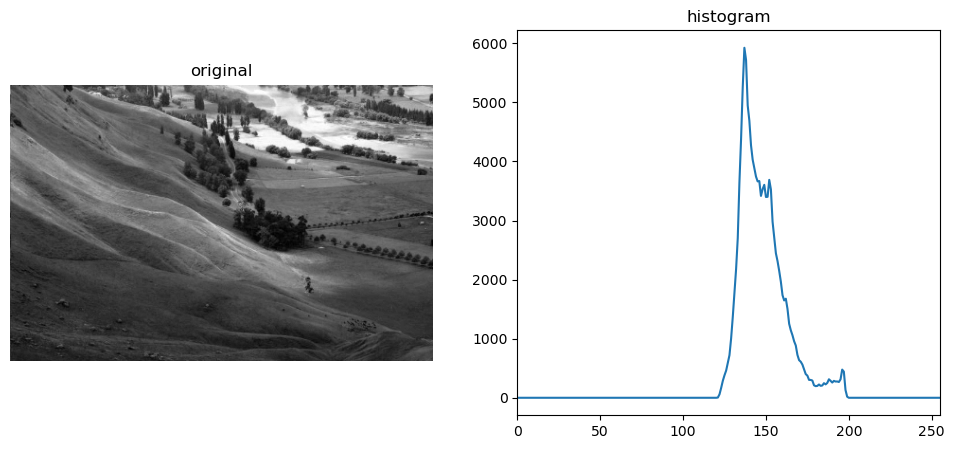

In [3]:
#실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1=cv2.imread("./image/histogram.png",cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("original")
plt.axis("off")

# 히스토그램
hist=cv2.calcHist([img1],[0],None, [256],[0,256])

plt.subplot(1,2,2)
plt.title("histogram")
plt.xlim([0,255])
plt.plot(hist)

##  칼라 이미지의 히스토그램

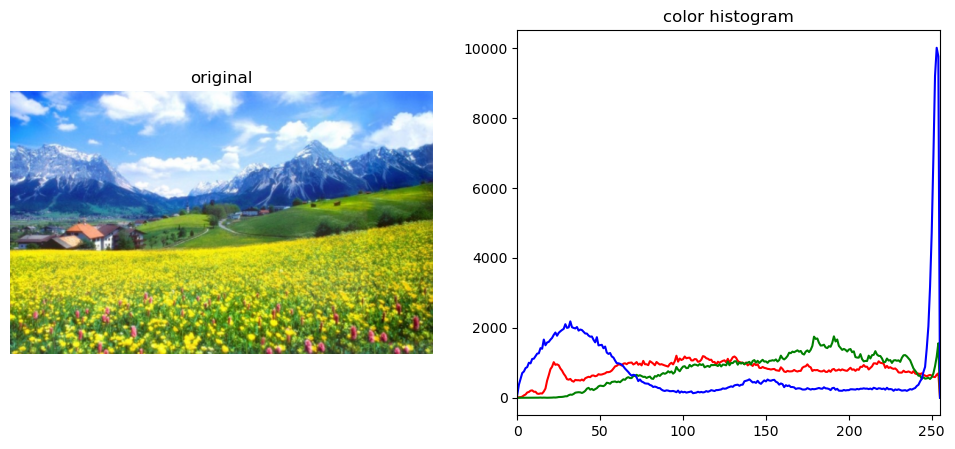

In [8]:
#실습

import cv2
import matplotlib.pyplot as plt
import numpy as np

img1=cv2.imread("./image/back1.png",cv2.IMREAD_COLOR)
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("original")
plt.axis("off")

#red 채널 히스토그램
hist_red=cv2.calcHist([img1],[0],None,[256],[0,255])
#green 채널 히스토그램
hist_green=cv2.calcHist([img1],[1],None,[256],[0,255])
#blue 채널 히스토그램
hist_blue=cv2.calcHist([img1],[2],None,[256],[0,255])

plt.subplot(1,2,2)

plt.title("color histogram")
plt.xlim([0,255])
plt.plot(hist_red,c="r")
plt.plot(hist_green,c="g")
plt.plot(hist_blue,c="b")



## 히스토그램 균일화

- 색상 분포를 균일하게 변경하여 이미지의 콘트라스트를 강조하는 방법

- <font color=red>cv2.equalizeHist(img)</font> : 히스토그램 균일화 함수


- 콘트라스트가 너무 강조된 경향이 있으므로 cv2.createCLAHE() 함수를 적용하면 더 나은 결과가 가능함.

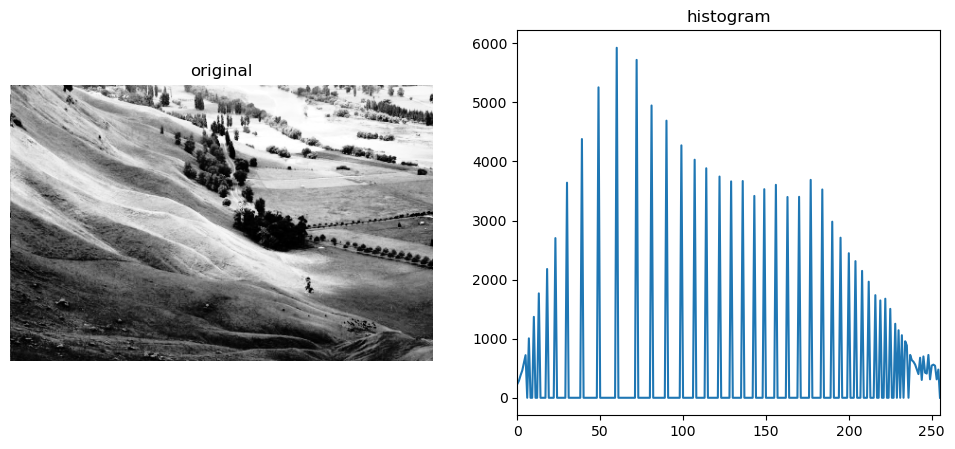

In [6]:
#실습

img1=cv2. equalizeHist(img1)
hist2=cv2.calcHist([img1],[0],None,[256],[0,255])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("histogram")
plt.xlim([0,255])
plt.plot(hist2)

## 2차원 히스토그램

- 2개의 축(H, S)이 만나는 지점의 개수를 표현

C:\Users\AI\Anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


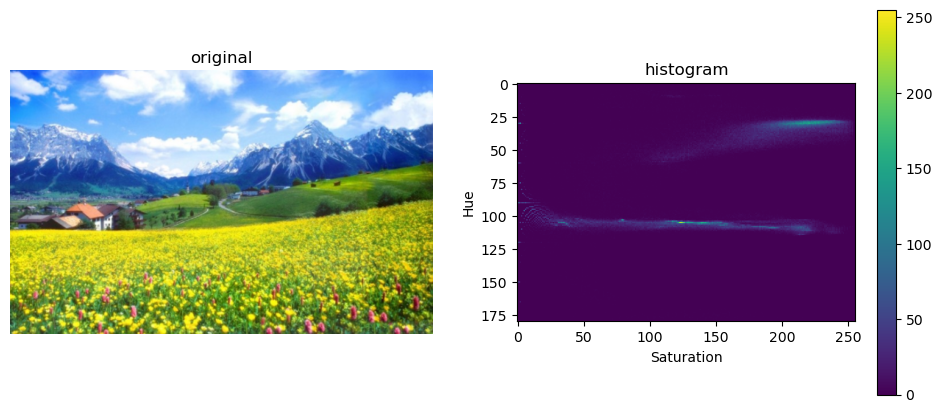

In [1]:
#실습

import cv2
import matplotlib.pyplot as plt
import numpy as np

img1=cv2.imread("./image/back1.png",cv2.IMREAD_COLOR)
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("original")
plt.axis("off")

#hsv로 변환 
hsv=cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

# [0,1]: 색상, 채도, 2(명도)
#[180,256] 색상(180)과 채도(256)의 눈금수
#[0,179,0,255] : 0,179(색상의 범위 ), 0, 255(채도의 범위)
hist=cv2.calcHist([hsv],[0,1],None,[180,256],[0,179,0,255])

plt.subplot(1,2,2)
plt.title("histogram")
plt.xlabel("Saturation")
plt.ylabel("Hue")
plt.colorbar()
plt.imshow(hist)

- 결과분석

  - 색상은 파란색과 노란색 계열이 주로 있음
  - 채도는 파란색은 채도가 골고루 분포되어 있고, 노란색에 높은 채도들이 주로 분포
  - 명도는 파란색과 노락색의 밝은 색상이 주로 분포
  
  
- HSV 색상공간의 색상분포  

  <img src="./lecture_image/hsv2.png" width=70%>  

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 이미지의 이차원 히스토그램을 그리고 색상 분포를 분석해보자</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/11_histogram1.png" width=70%></td></tr>   
</table>

# 주파수 기반 이미지처리

- LPF (Low pass filter) : 낮은 주파수 영역 (배경, 객체 내부)만 남아 있는 이미지를 추출하는 필터 - blur 필터
- HPF (HIgh pass filter) : 높은 주파수 영역 (에지, 노이즈 등)만 남아 있는 이미지를 추출하는 필터 - 에지 검출 필터


- 이미지를 주파수 영역으로 변환하면 다양한 주파수 영역 필터 작업이 가능해짐


- 주파수 기반 처리 방법 : 푸리에 변환, DCT 변환, WT 변환 등

## 푸리에 변환 (Fourier Transform)

- 이미지 처리에서 화소의 밝기의 변화를 분해하여 그 안에 들어 있는 주파수 성분을 추출하는 방법


- DFT (Descrete Fourier Transform) 
  - 디지털 신호에 사용
  - 복소수의 실수부와 허수부를 벡터로 하여 벡터의 크기 계산 (주파수 스펙트럼)
  - 복소수의 실수부와 허수부의 기울기 계산 (주파수 위상)
  
  <img src="./lecture_image/11_fourier_equ.png" width=30%>     
  
  
- 주파수 스펙트럼 
  - 저주파 영역이 모서리 부분에 고주파 영역이 중심부에 위치
  - 사각형의 각 모서리를 중심으로 원형의 밴드를 형성하여 주파수 영역에 분포
  - 일반적으로 보기쉽게 하기 위해 서플링을 통해 고주파 영역을 중앙으로 변경
  

  <img src="./lecture_image/11_fft.png" width=70%>   

- <font color=red>f = np.fft.fft2(img)</font> : 푸리에 변환 수행
  - 저주파 성분이 각 모서리에 배치됨
- <font color=red>fshift = np.fft.fftshift(f)</font> 
  - 저주파수 성분을 각 모서리에서 중앙으로 이동하여 재배열시킴
- <font color=red>m_spectrum = 20 * np.log(np.abs(fshift))</font> 
  - 진폭 스펙트럼을 계산

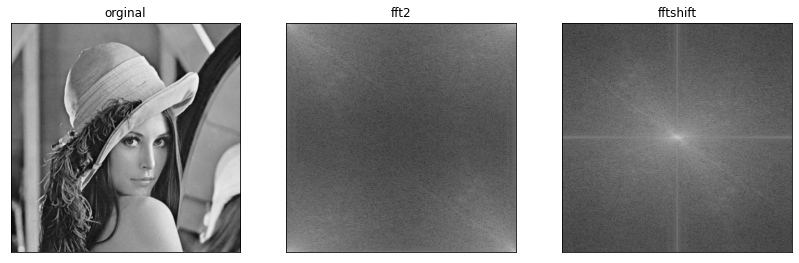

In [53]:
#실습

## 저주파 영역 제거 후 복원 (에지검출)

<img src="./lecture_image/11_fourier2.png">

- <font color=red>f_ishift = np.fft.ifftshift(fshift)</font> 
  - 재배열된 주파수 값들의 위치를 원래대로 되돌림
- <font color=red>img_back = np.fft.ifft2(f_ishift)</font> 
  - 역 DFT를 수행하여 원래 이지미 영역으로 전환

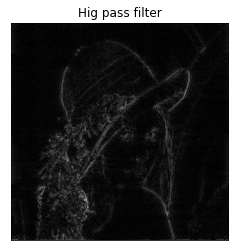

In [55]:
#실습

## 저주파수 영역만 잘라서 복원

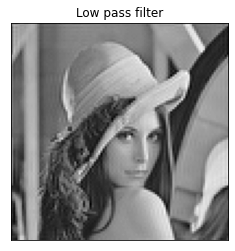

In [57]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 이미지를 푸리에 변환하고 저주파 영역만을 잘라서 복원해보자</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/11_fourier3.png" width=70%></td></tr>   
</table>

## DCT 변환

- 이산 코사인 변환이라고도 하며, 영상 압축을 위한 방식중의 하나
- 영상을 NxN 블럭으로 공식을 사용해 변환하면, 분포되어 있던 화소값이 변환 후 이웃 화소 간 별 차이 없는 저주파 영역에 집중되는 것을 이용하여 압축을 시도하는 방식
- DCT 방식을 사용하면 중복성 제거를 통해, 인간의 시각에는 둔감한 고주파 성분을 제거함으로서 압축이 가능해짐

<img src="./lecture_image/11_dct1.png" width=70%>

In [181]:
#실습

529.4244813707056


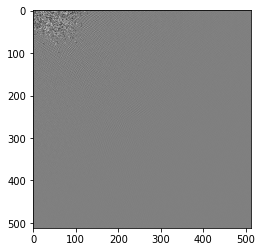

In [189]:
#실습

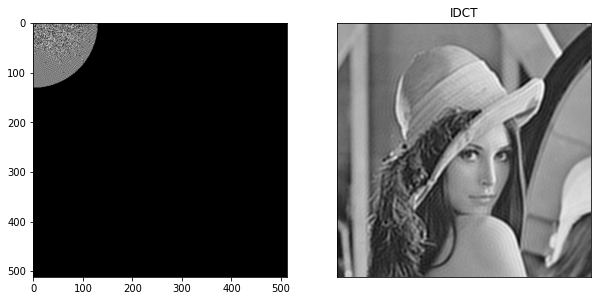

In [190]:
#실습

# Wavelet 변환

- MPEG4 영상압축에 사용하는 기법
- 웨이블릿 변환은 고주파 성분의 신호에 대해서는 시간 해상도를 높이고 주파수 해상도를 낮추고, 저주파 성분의 신호에 대해서는 주파수 해상도를 높이고 시간해상도를 낮춤
- STFT가 시간 분해능과 주파수 분해능 중 하나를 포기해야했다면 웨이블릿 변환은 교묘하게 둘다 고려한 방법 

<img src="./lecture_image/11_wavelet.jpg" width=60%>

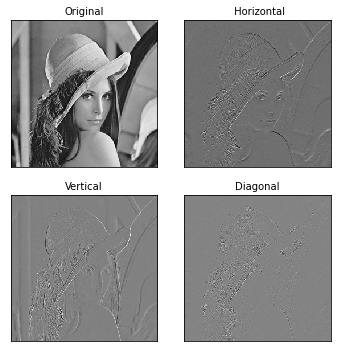

In [203]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[11차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 히스토그램 (Histogram) : 이미지의 색상 별로 픽셀의 개수를 그래프로 표시한 것

○ <font color=red>calcHist([이미지], [채널], 특정 부분 마스크, [색상 개수], [픽셀값의 범위])</font>
  - 히스토그램을 계산
  - 채널은 흑백영상인 경우는 0, 칼라영상인 경우는 R(0), G(1), B(2)

○ 히스토그램 균일화 : 색상 분포를 균일하게 변경하여 이미지의 콘트라스트를 강조하는 방법
   - <font color=red>cv2.equalizeHist(img)</font> : 히스토그램 균일화 함수

○ 주파수 기반 이미지처리
  - LPF (Low pass filter) : 낮은 주파수 영역 (배경, 객체 내부)만 남아 있는 이미지를 추출하는 필터 - blur 필터
  - HPF (HIgh pass filter) : 높은 주파수 영역 (에지, 노이즈 등)만 남아 있는 이미지를 추출하는 필터 - 에지 검출 필터
  - 이미지를 주파수 영역으로 변환하면 다양한 주파수 영역 필터 작업이 가능해짐
  - 주파수 기반 처리 방법 : 푸리에 변환, DCT 변환, WT  변환 등            
        
</font></td></tr>   
</table>